In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

sns.set(style="whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv("marksheet.csv")
df.head()

,id,Name,Gender,Age,Section,Science,English,History,Maths
0,1,Bronnie,Female,13,C,21,81,62,49
1,2,Lemmie,Male,15,B,29,41,17,40
2,3,Danya,Female,14,C,12,87,16,96
3,4,Denna,Female,14,B,15,53,82,33
4,5,Jocelin,Male,14,A,43,6,3,21


In [3]:
# Calculate total marks from all 4 subjects
df["Total_Marks"] = df["Maths"] + df["Science"] + df["English"] + df["History"]
df[["Name", "Total_Marks"]].head()

,Name,Total_Marks
0,Bronnie,213
1,Lemmie,127
2,Danya,211
3,Denna,183
4,Jocelin,73


In [4]:
# Calculate percentage
df["Percentage"] = (df["Total_Marks"] / 400) * 100
df[["Name", "Total_Marks", "Percentage"]].head()

,Name,Total_Marks,Percentage
0,Bronnie,213,53.25
1,Lemmie,127,31.75
2,Danya,211,52.75
3,Denna,183,45.75
4,Jocelin,73,18.25


In [5]:
# Calculate rank based on total marks
df["Rank"] = df["Total_Marks"].rank(ascending=False, method="min")
df[["Name", "Total_Marks", "Rank"]].head()

,Name,Total_Marks,Rank
0,Bronnie,213,111.0
1,Lemmie,127,224.0
2,Danya,211,114.0
3,Denna,183,163.0
4,Jocelin,73,246.0


In [6]:
# Calculate percentile
N = len(df)
df["Percentile"] = (1 - (df["Rank"] - 1) / N) * 100
df[["Name", "Rank", "Percentile"]].head()

,Name,Rank,Percentile
0,Bronnie,111.0,56.0
1,Lemmie,224.0,10.8
2,Danya,114.0,54.8
3,Denna,163.0,35.2
4,Jocelin,246.0,2.0


In [7]:
# Assign percentage labels (C1, C2, C3, etc.)
def percentage_label(p):
    if p >= 91:
        return "C1"
    elif p >= 81:
        return "C2"
    elif p >= 71:
        return "C3"
    elif p >= 61:
        return "C4"
    elif p >= 50:
        return "C5"
    else:
        return "F"

df["Percentage_Label"] = df["Percentage"].apply(percentage_label)
df["Percentage_Label"].value_counts()

Percentage_Label
F     120
C5     61
C4     46
C3     18
C2      5
Name: count, dtype: int64

In [8]:
# Assign percentile labels (P1, P2, P3, etc.)
def percentile_label(p):
    if p >= 91:
        return "P1"
    elif p >= 81:
        return "P2"
    elif p >= 71:
        return "P3"
    elif p >= 61:
        return "P4"
    elif p >= 50:
        return "P5"
    else:
        return "F"

df["Percentile_Label"] = df["Percentile"].apply(percentile_label)
df["Percentile_Label"].value_counts()

Percentile_Label
F     124
P5     28
P4     25
P2     25
P3     25
P1     23
Name: count, dtype: int64

In [9]:
# Assign grades based on percentage
def assign_grade(p):
    if p >= 91:
        return "O"
    elif p >= 85:
        return "A+"
    elif p >= 75:
        return "A"
    elif p >= 65:
        return "B+"
    elif p >= 60:
        return "B"
    elif p >= 55:
        return "C"
    elif p >= 50:
        return "P"
    else:
        return "F"

df["Grade"] = df["Percentage"].apply(assign_grade)
df["Grade"].value_counts()

Grade
F     120
B+     33
P      32
C      25
B      25
A      11
A+      4
Name: count, dtype: int64

In [10]:
# View all calculated metrics together
df[["Name", "Percentage", "Percentile", "Grade", "Percentage_Label", "Percentile_Label"]].head(10)

,Name,Percentage,Percentile,Grade,Percentage_Label,Percentile_Label
0,Bronnie,53.25,56.0,P,C5,P5
1,Lemmie,31.75,10.8,F,F,F
2,Danya,52.75,54.8,P,C5,P5
3,Denna,45.75,35.2,F,F,F
4,Jocelin,18.25,2.0,F,F,F
5,Malissa,77.50,96.4,A,C3,P1
6,Ichabod,56.50,64.0,C,C5,P4
7,Beverlie,49.25,46.8,F,F,F
8,Corrine,31.50,10.4,F,F,F
9,Tate,31.00,8.8,F,F,F


In [11]:
# Prepare features (X) and target variables (y)
# Features: the 4 subject marks
X = df[["Maths", "Science", "English", "History"]]

# Different target variables based on different performance metrics
y_percentage = df["Percentage_Label"]
y_percentile = df["Percentile_Label"]
y_grade = df["Grade"]

In [12]:
# Train and evaluate model using Percentage Labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y_percentage, test_size=0.2, random_state=42, stratify=y_percentage
)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc_percentage = accuracy_score(y_test, y_pred)
f1_percentage = f1_score(y_test, y_pred, average='weighted')

print("Model trained on Percentage Labels:")
print(f"Accuracy: {acc_percentage:.3f}")
print(f"F1 Score: {f1_percentage:.3f}")

Model trained on Percentage Labels:
Accuracy: 0.680
F1 Score: 0.684


In [13]:
# Train and evaluate model using Percentile Labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y_percentile, test_size=0.2, random_state=42, stratify=y_percentile
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc_percentile = accuracy_score(y_test, y_pred)
f1_percentile = f1_score(y_test, y_pred, average='weighted')

print("Model trained on Percentile Labels:")
print(f"Accuracy: {acc_percentile:.3f}")
print(f"F1 Score: {f1_percentile:.3f}")

Model trained on Percentile Labels:
Accuracy: 0.540
F1 Score: 0.559


In [14]:
# Train and evaluate model using Grades
X_train, X_test, y_train, y_test = train_test_split(
    X, y_grade, test_size=0.2, random_state=42, stratify=y_grade
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc_grade = accuracy_score(y_test, y_pred)
f1_grade = f1_score(y_test, y_pred, average='weighted')

print("Model trained on Grades:")
print(f"Accuracy: {acc_grade:.3f}")
print(f"F1 Score: {f1_grade:.3f}")

Model trained on Grades:
Accuracy: 0.680
F1 Score: 0.677


In [15]:
# Compare all results in a table
results = pd.DataFrame({
    "Performance Metric": ["Percentage Label", "Percentile Label", "Grade"],
    "Accuracy": [acc_percentage, acc_percentile, acc_grade],
    "F1 Score": [f1_percentage, f1_percentile, f1_grade]
})

print("\nComparison of Model Performance:")
print(results)


Comparison of Model Performance:
  Performance Metric  Accuracy  F1 Score
0   Percentage Label      0.68  0.684162
1   Percentile Label      0.54  0.559342
2              Grade      0.68  0.677174


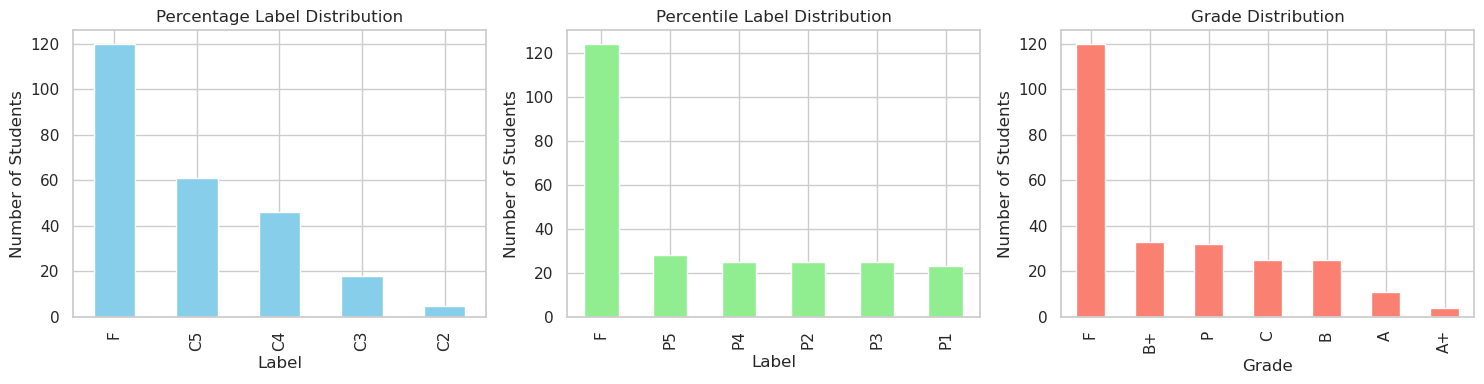

In [16]:
# Compare how many students are in each category
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Percentage Labels
df['Percentage_Label'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Percentage Label Distribution')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Number of Students')

# Percentile Labels
df['Percentile_Label'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Percentile Label Distribution')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Number of Students')

# Grades
df['Grade'].value_counts().plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Grade Distribution')
axes[2].set_xlabel('Grade')
axes[2].set_ylabel('Number of Students')

plt.tight_layout()
plt.savefig('label_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

       Feature Used  Accuracy  F1 Score
0  Percentage Label      0.68  0.684162
1  Percentile Label      0.54  0.559342
2             Grade      0.68  0.677174


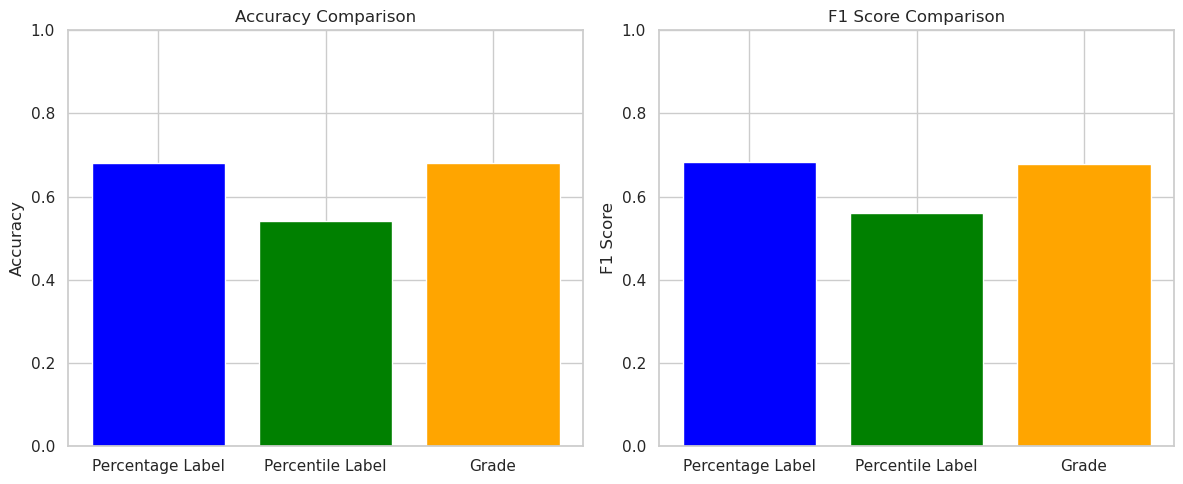

In [17]:
# Model performance comparison
results = pd.DataFrame({
    "Feature Used": ["Percentage Label", "Percentile Label", "Grade"],
    "Accuracy": [acc_percentage, acc_percentile, acc_grade],
    "F1 Score": [f1_percentage, f1_percentile, f1_grade]
})

print(results)

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy comparison
ax[0].bar(results["Feature Used"], results["Accuracy"], color=['blue', 'green', 'orange'])
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy Comparison')
ax[0].set_ylim([0, 1])

# F1 Score comparison
ax[1].bar(results["Feature Used"], results["F1 Score"], color=['blue', 'green', 'orange'])
ax[1].set_ylabel('F1 Score')
ax[1].set_title('F1 Score Comparison')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# Show top 10 students to see how labels differ
top_10 = df.nlargest(10, 'Total_Marks')[['Name', 'Total_Marks', 'Percentage', 
                                           'Percentage_Label', 'Percentile_Label', 'Grade']]
print("Top 10 Students:")
print(top_10)

Top 10 Students:
         Name  Total_Marks  Percentage Percentage_Label Percentile_Label Grade
10       Dunn          361       90.25               C2               P1    A+
120  Patrizia          356       89.00               C2               P1    A+
68        Nil          347       86.75               C2               P1    A+
91      Daffi          341       85.25               C2               P1    A+
200    Ruddie          333       83.25               C2               P1     A
150    Herold          320       80.00               C3               P1     A
178       Val          320       80.00               C3               P1     A
39     Luelle          317       79.25               C3               P1     A
222      Leda          311       77.75               C3               P1     A
5     Malissa          310       77.50               C3               P1     A
